In [73]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from tqdm import tqdm
from multiprocessing import Pool

-0.03128491418258227 278.36178326034246


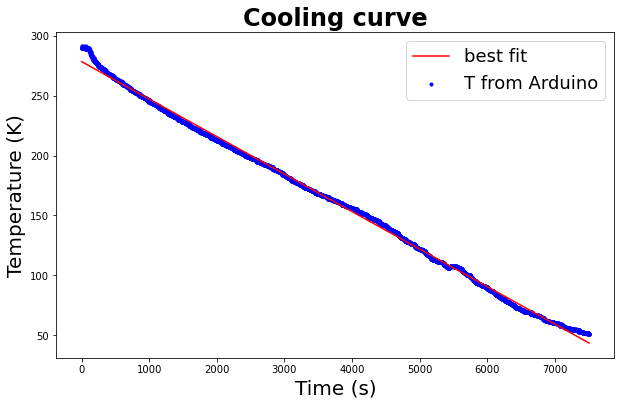

In [106]:
data = np.loadtxt("data\dati_1.txt")
x = data[:,0]
y = data[:,1]
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x=x, y=y, marker='.', c='b', label="T from Arduino")
#ax.plot(x, y, linewidth=3,  c="coral", label="T from Arduino")
ax.set_title('Cooling curve',weight='bold', size=24)
ax.set_xlabel('Time (s)', fontsize=20)
ax.set_ylabel('Temperature (K)', fontsize=20)
m, b = np.polyfit(x, y, 1)
print(m,b)
plt.plot(x, m*x + b, c = 'r', label="best fit")
ax.legend(loc='best', fontsize=18)

plt.show()